<a href="https://colab.research.google.com/github/lokeshdarla/cat-vs-dog/blob/main/colab-notebooks/data-augementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation
Data augmentation is a technique used to increase the diversity of your training data by applying various transformations to your existing dataset.

### 1. **Purpose of Data Augmentation**
   - Helps **prevent overfitting** by artificially increasing the size and variability of the training dataset.
   - Makes the model more resilient to variations in input data.

### 2. **Common Augmentation Techniques**
   - **Geometric Transformations:**
     - **Rotation:** Rotates images by a certain angle.
     - **Translation:** Shifts images horizontally or vertically.
     - **Scaling:** Resizes images, often to zoom in or out.
     - **Shearing:** Applies a shear transformation to images, which tilts them.
     - **Flipping:** Mirrors images horizontally or vertically.
   - **Color Space Adjustments:**
     - **Brightness:** Adjusts the brightness of images.
     - **Contrast:** Modifies the contrast between light and dark areas.
     - **Saturation:** Changes the intensity of colors.
     - **Hue:** Alters the color hue.
   - **Noise Addition:**
     - **Gaussian Noise:** Adds random noise to images to simulate real-world variability.
   - **Cropping and Padding:**
     - **Random Cropping:** Crops a random portion of the image and resizes it.
     - **Padding:** Adds extra pixels around the image, often used before cropping.
   - **Random Erasing:** Randomly selects a region of the image and replaces it with a constant value or noise.




In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [3]:
def load_and_preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path)  # Load an image
    img_array = tf.keras.preprocessing.image.img_to_array(img)  # Convert to array
    img_array = tf.expand_dims(img_array, 0)  # Create a batch axis
    return img_array

In [4]:
def augment_data(image_path, num_augmentations=5):
    img_array = load_and_preprocess_image(image_path)
    augmented_images = []
    for batch in datagen.flow(img_array, batch_size=1):
        augmented_images.append(batch[0].astype('uint8'))
        if len(augmented_images) >= num_augmentations:
            break
    return augmented_images

In [6]:
cat_image_path = '/content/cat.jpeg'  # Replace with your image path
cat_augmented_images = augment_data(cat_image_path)

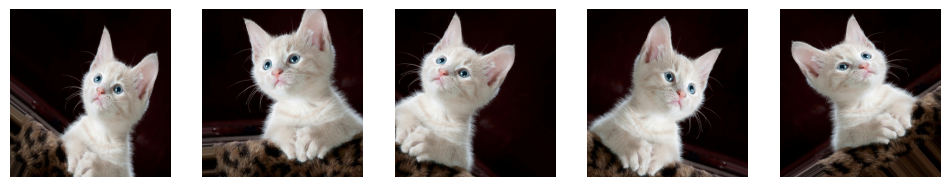

In [8]:
plt.figure(figsize=(12, 8))
for i, img in enumerate(cat_augmented_images):
    plt.subplot(1, len(cat_augmented_images), i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [12]:
dog_image_path = '/content/dog.jpg'  # Replace with your image path
dog_augmented_images = augment_data(dog_image_path)

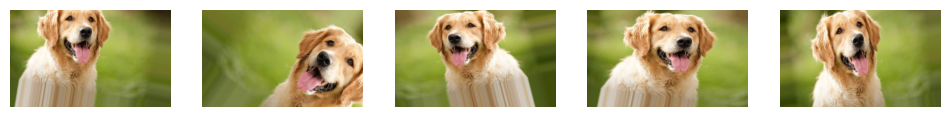

In [13]:
plt.figure(figsize=(12, 8))
for i, img in enumerate(dog_augmented_images):
    plt.subplot(1, len(dog_augmented_images), i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()